# 타이타닉 실습 01
- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성

### contents
1. 데이터셋 확인
- null data check
- target label 확인

2. Exploratory data analysis


In [1]:
# 필요 패키지 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 다른 스타일도 사용가능, 여기서는 'seaborn'스타일 사용
sns.set(font_scale = 2.5) # 일일이 font size 를 지정할 필요없이 seaborn의 font_scale을 사용하겠다.

# 데이터셋에 채워지지 않은 null 데이터를 쉽게 찾아주는 패키지
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#노트북에서 바로바로 시각화 가능

1. 데이터셋 확인
- null data 확인하고 수정

2. 탐색적 데이터 분석
- 여러 feature 개별 분석
- feature 간 상관관계 확인
- 시각화를 통한 insight 도출

3. feature engineering
- 모델 성능을 높일 수 있도록 feature engineering
- one-hot encoding / class로 나누기 / 구간으로 나누기/ 텍스트 데이터 처리 등

4. model 생성
- sklearn
- 딥러닝을 위해 tensorflow/pythorch 등 사용

5. model 학습 및 예측
- trainset 을 가지고 모델 학습 후, testset을 가지고 예측

6. model 평가
- 예측 성능이 원하는 수준인지 판단

### 01. Dataset 확인

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


- Train, Test 데이터셋 모두 Age(약 20%), Cabin(약 80%), Train 데이터셋의 Embarked(0.22%)Null data가 존재한다

<AxesSubplot:>

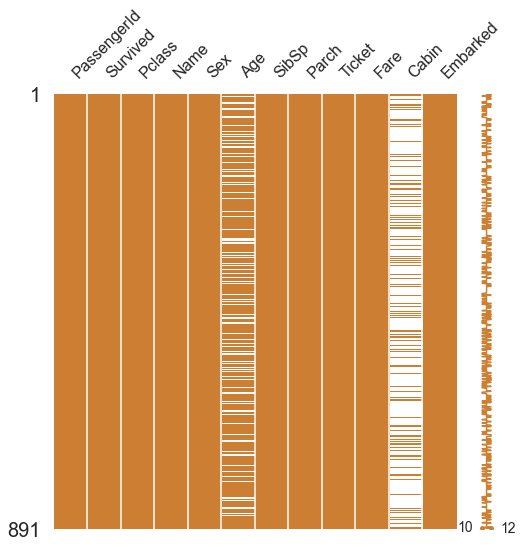

In [8]:
# MSNO라이브러리를 사용하면 null data 의 존재를 더 쉽게 볼 수 있다. 
msno.matrix(df = df_train.iloc[:,:], figsize =(8,8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

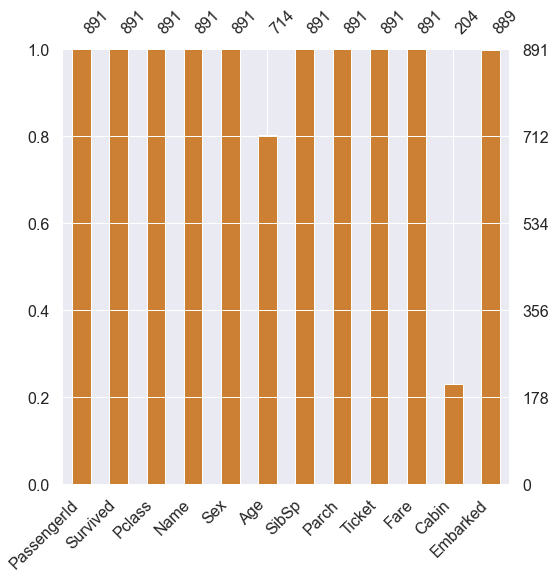

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize = (8,8) ,color = (0.8, 0.5, 0.2))

<AxesSubplot:>

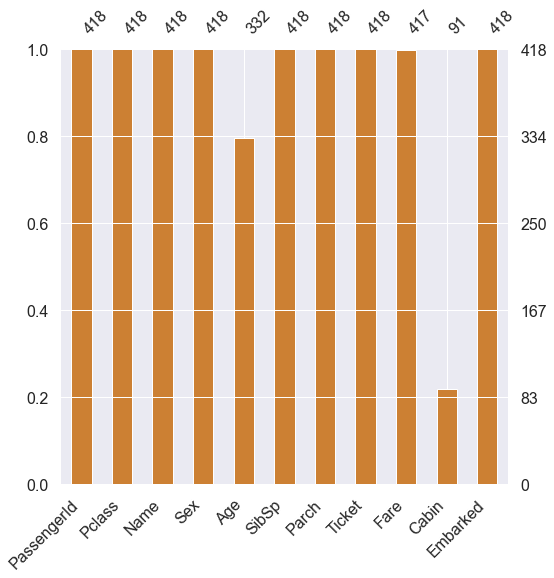

In [10]:
msno.bar(df=df_test.iloc[:,:], figsize = (8,8) ,color = (0.8, 0.5, 0.2))

### Target label 확인
- target label 이 어떤 distribution 을 가지고 있는 지 확인해야 한다.
- 지금과 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다

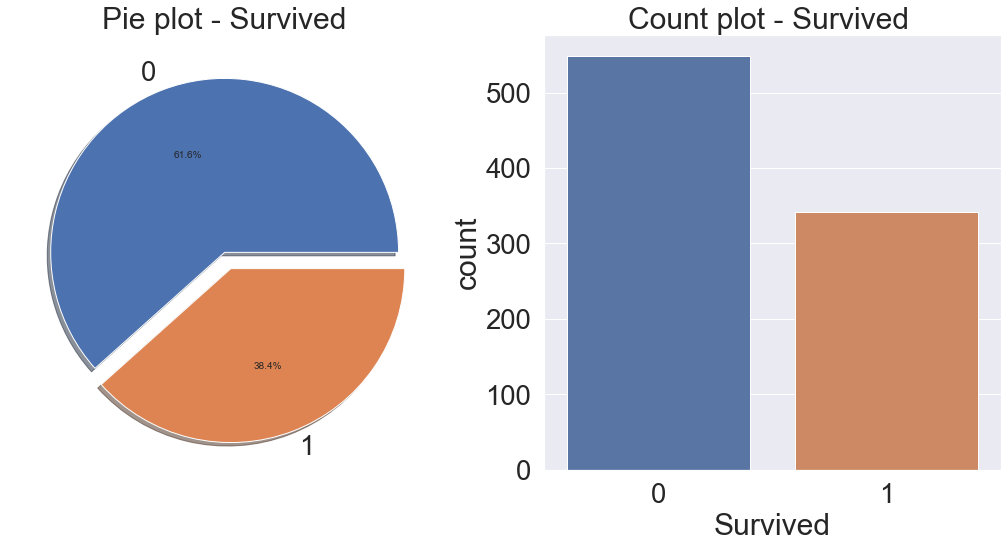

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                             autopct = '%1.1f%%',
                                             ax = ax[0],
                                             shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train , ax = ax[1])
ax[1].set_title('Count plot - Survived ')

plt.show()

- 사망자: 61.6% , 생존자: 38.4%
- target label 의 분포가 균일한 편

### Exploratory Data Analysis
- 시각화를 통한 insight 도출

#### Pclass
- 티켓의 클래스
- 1 = 1st , 2 = 2st , 3 = 3st로 나뉨
- 순서가 있는 데이터 
- Pclass 에 따른 생존률(survived = 1) 차이를 살펴본다 

In [12]:
# count() 를 하면 각 class에 몇명이 있었는지 확인가능
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# sum() 를 하면 각 class 에 생존자가 몇명 있었는지 확인 가능
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 crosstab을 사용하면 위 과정을 좀 더 쉽게 볼 수 있다.

In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')
# margin = True 를 주면 열, 행 합계(All)를 제시해준다

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스 별 생존률을 얻을 수 있다. 
- ex) 136(생존자) / 80(사망자) + 136(생존자) = 0.629

<AxesSubplot:xlabel='Pclass'>

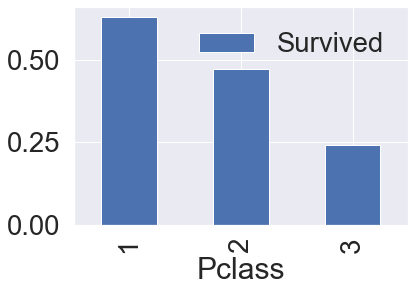

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'] , as_index = True).mean().sort_values(by = 'Survived' , ascending = False).plot.bar()

- Pclass 가 높을수록(1st) 생존률이 높다 

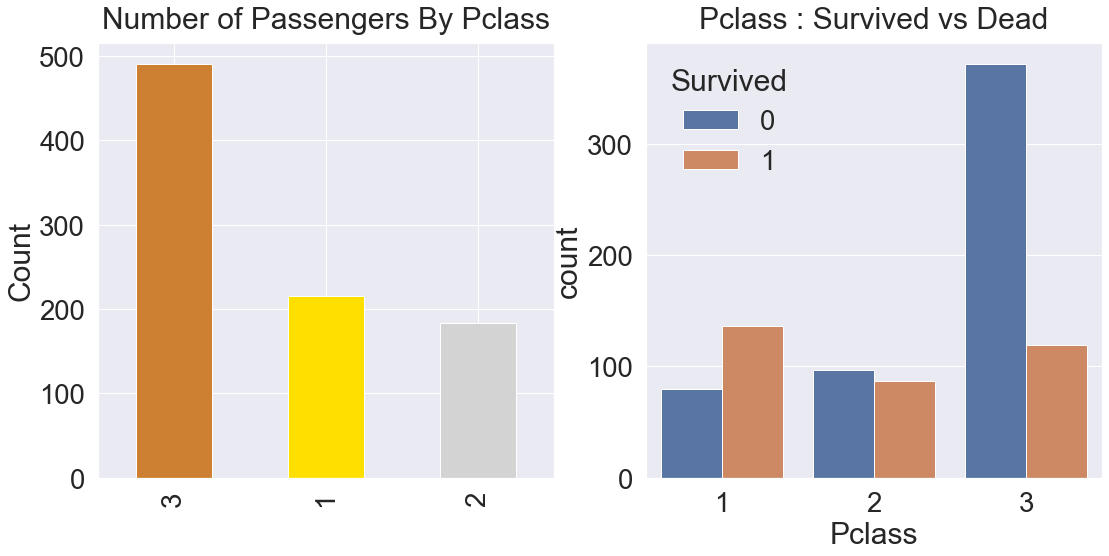

In [16]:
y_position = 1.02
# 타이틀이 위치 상수값
f, ax = plt.subplots(1,2,figsize=(18, 8))

# ax[0]은 왼쪽 그래프, ax[1] 는 오른쪽 그래프
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],
                                           ax = ax[0])
ax[0].set_title("Number of Passengers By Pclass" , y = y_position)
ax[0].set_ylabel('Count')

#ax[1] 오른쪽에 그래프를 그린다
sns.countplot('Pclass' , hue = 'Survived', data = df_train , ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

- 클래스가 높을 수록, 생존확률이 높다는 걸 확인할 수 있다.

insight => 생존에 'Pclass'가 큰 영향을 미친다고  생각할 수 있고, 모델을 세울 때 해당 Feature를 사용하는 것이 좋을 것 이라 판단할 수 있다.

### Sex
- 성별로 생존률이 어떻게 달라지는 지 확인한다.

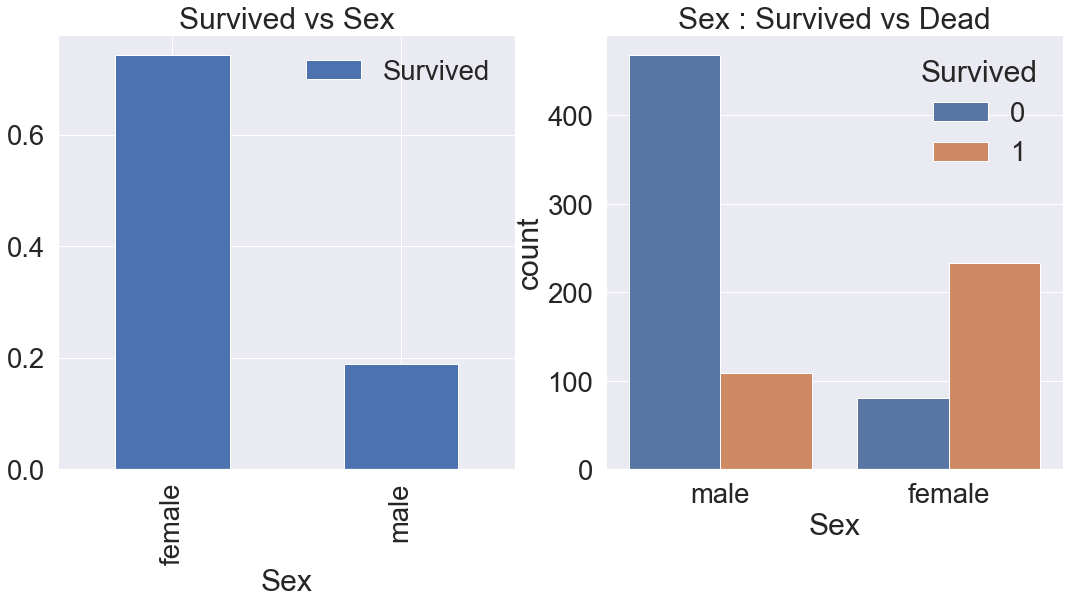

In [19]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = df_train , ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

- 여성의 생존률이 더 높다

In [20]:
df_train[['Sex' , 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')
# style.background_gradient(cmap='summer_r') => 숫자에 따라 색을 다르게 입힐 수 있음

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature

### Both Sex and Pclass
- Sex, Pclass 두가지에 관해 생존이 어떻게 달라지는 확인한다.
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다

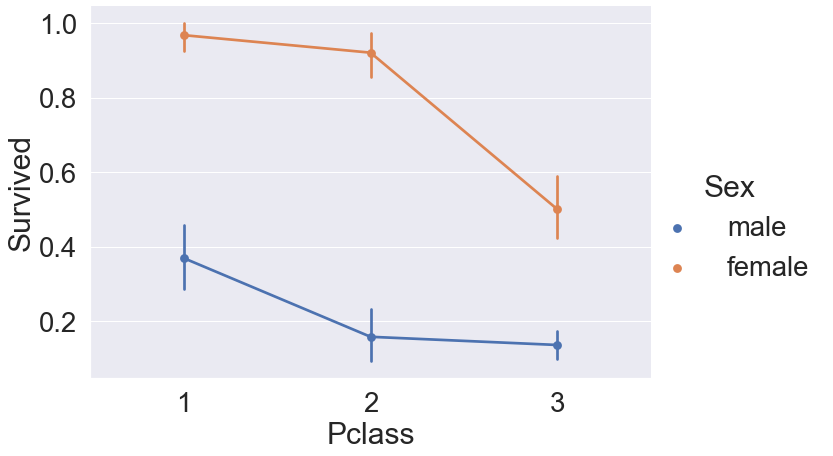

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train ,
               size = 6, aspect = 1.5)

- 모든 클래스에서 남성보다 여성이 생존할 확률이 높다.
- 또 성별에 상관없이 클래스가 높을 수록 생존할 확률이 높다.

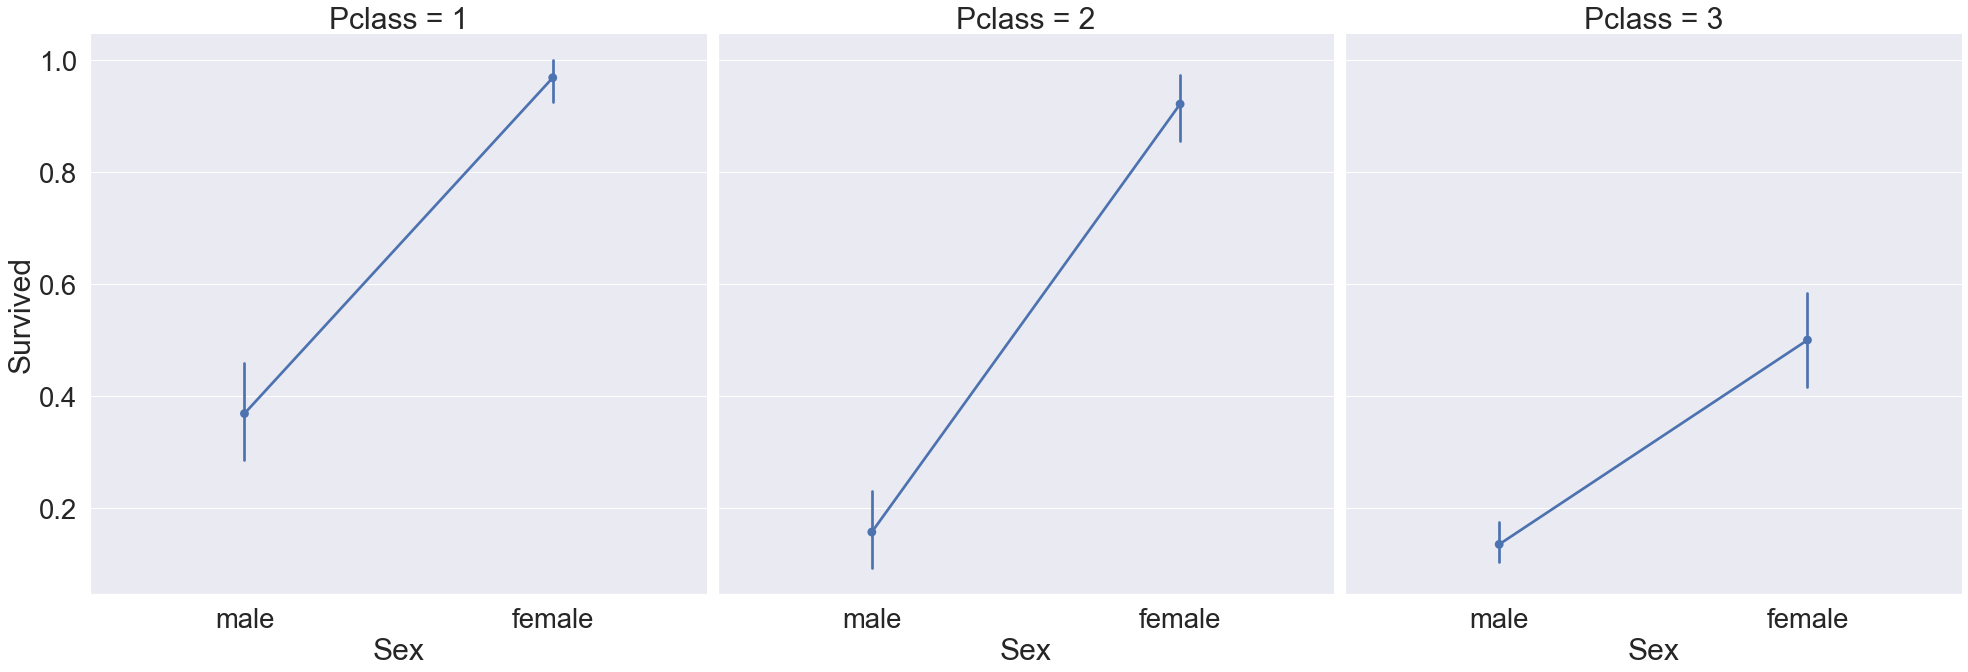

In [31]:
sns.factorplot(x = 'Sex' , y = 'Survived' , col = 'Pclass',
              data  = df_train , satureation = .5 , size = 9)

### Age 

In [35]:
# {:.0f} => 소수점 0자리 / {:.1f} => 소수점 1자리 
print('가장 나이가 많은 탑승객 : {:.0f}살'.format(df_train['Age'].max()))
print()
print('가장 나이가 어린 탑승객 : {:.1f}살'.format(df_train['Age'].min()))
print()
print('탑승객의 평균 나이 : {:.1f}살'.format(df_train['Age'].mean()))


가장 나이가 많은 탑승객 : 80살

가장 나이가 어린 탑승객 : 0.4살

탑승객의 평균 나이 : 29.7살


- 연령별 생존률 히스토그램

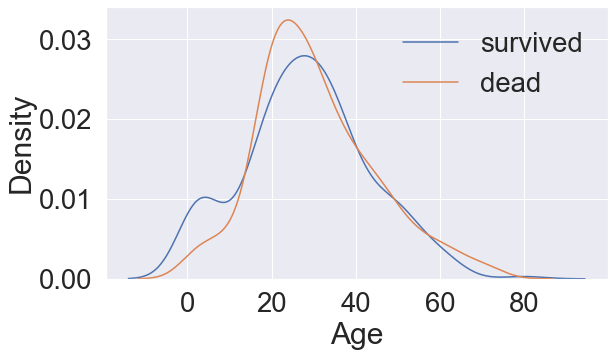

In [39]:
fig, ax = plt.subplots(1,1,figsize = (9,5))

# kdeplot => 커널밀도추정: 히스토그램 분포를 부드럽게 곡선화
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['survived', 'dead'])
plt.show()

- 생존자 중 나이가 어린 경우가 많다

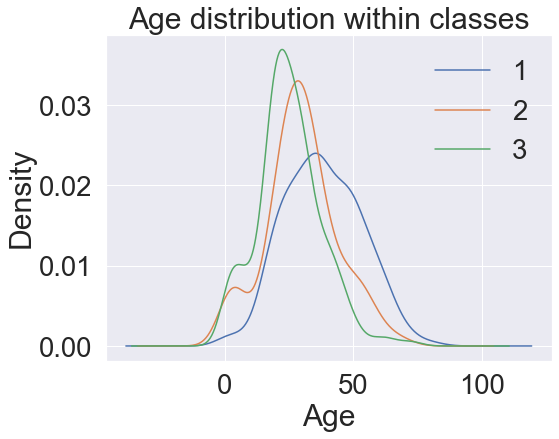

In [80]:
# Age distribution within classes

plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1','2','3'])

- class 가 높아질수록 나이가 많은 사람의 비중이 커진다
- 나이대가 변화함에 따라 생존률이 어떻게 변화하는지 살펴본다

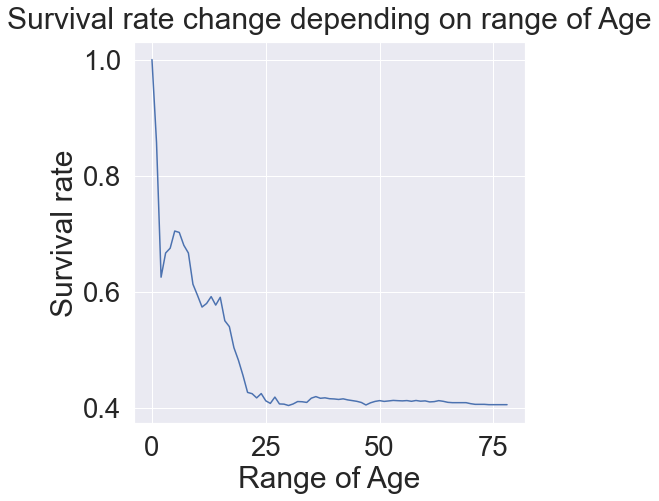

In [81]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
#  y=1.02 => 제목 위치 지정
plt.title('Survival rate change depending on range of Age', y=1.02) 
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있다.
- 나이는 중요한 feature 로 사용될 수 있다. 

### Pclass, Sex, Age
- 세가지 feature 에 대한 생존률을 살펴본다
- seaborn의 violinplot 이다.
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 distribution(Age)이다

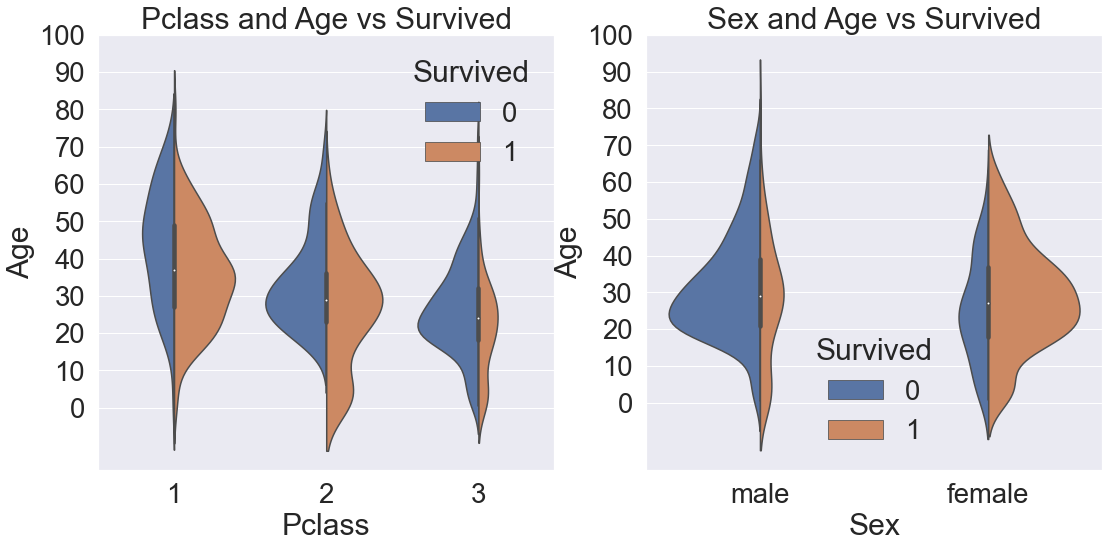

In [82]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass','Age',hue = 'Survived', data = df_train ,
               scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue = 'Survived', data = df_train,
              scale ='count', split = True , ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

- 왼쪽 그래프는 Pclass 별로 Age의 분포가 어떻게 다른지, 생존여부에 따라 구분
- 오른쪽 그래프는 Sex 별로 Age 분포가 어떻게 다른지, 생존여부에 따라 구분

### Embarked
- Embarked 는 탑승한 항구를 나타낸다.
- 위와 유사한 방식으로 탑승한 곳에 따른 생존률을 확인한다.

<AxesSubplot:xlabel='Embarked'>

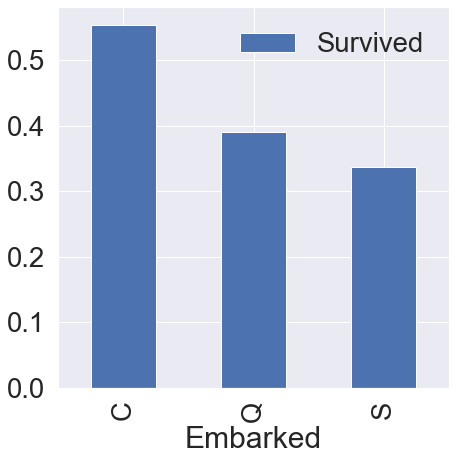

In [68]:
f,ax = plt.subplots(1, 1, figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

- C 가 생존률이 가장 높은 것을 알 수 있음
- 다른 feature 로 분류해 다시 살펴본다

Text(0.5, 1.0, '(4)Embarked vs Pclass')

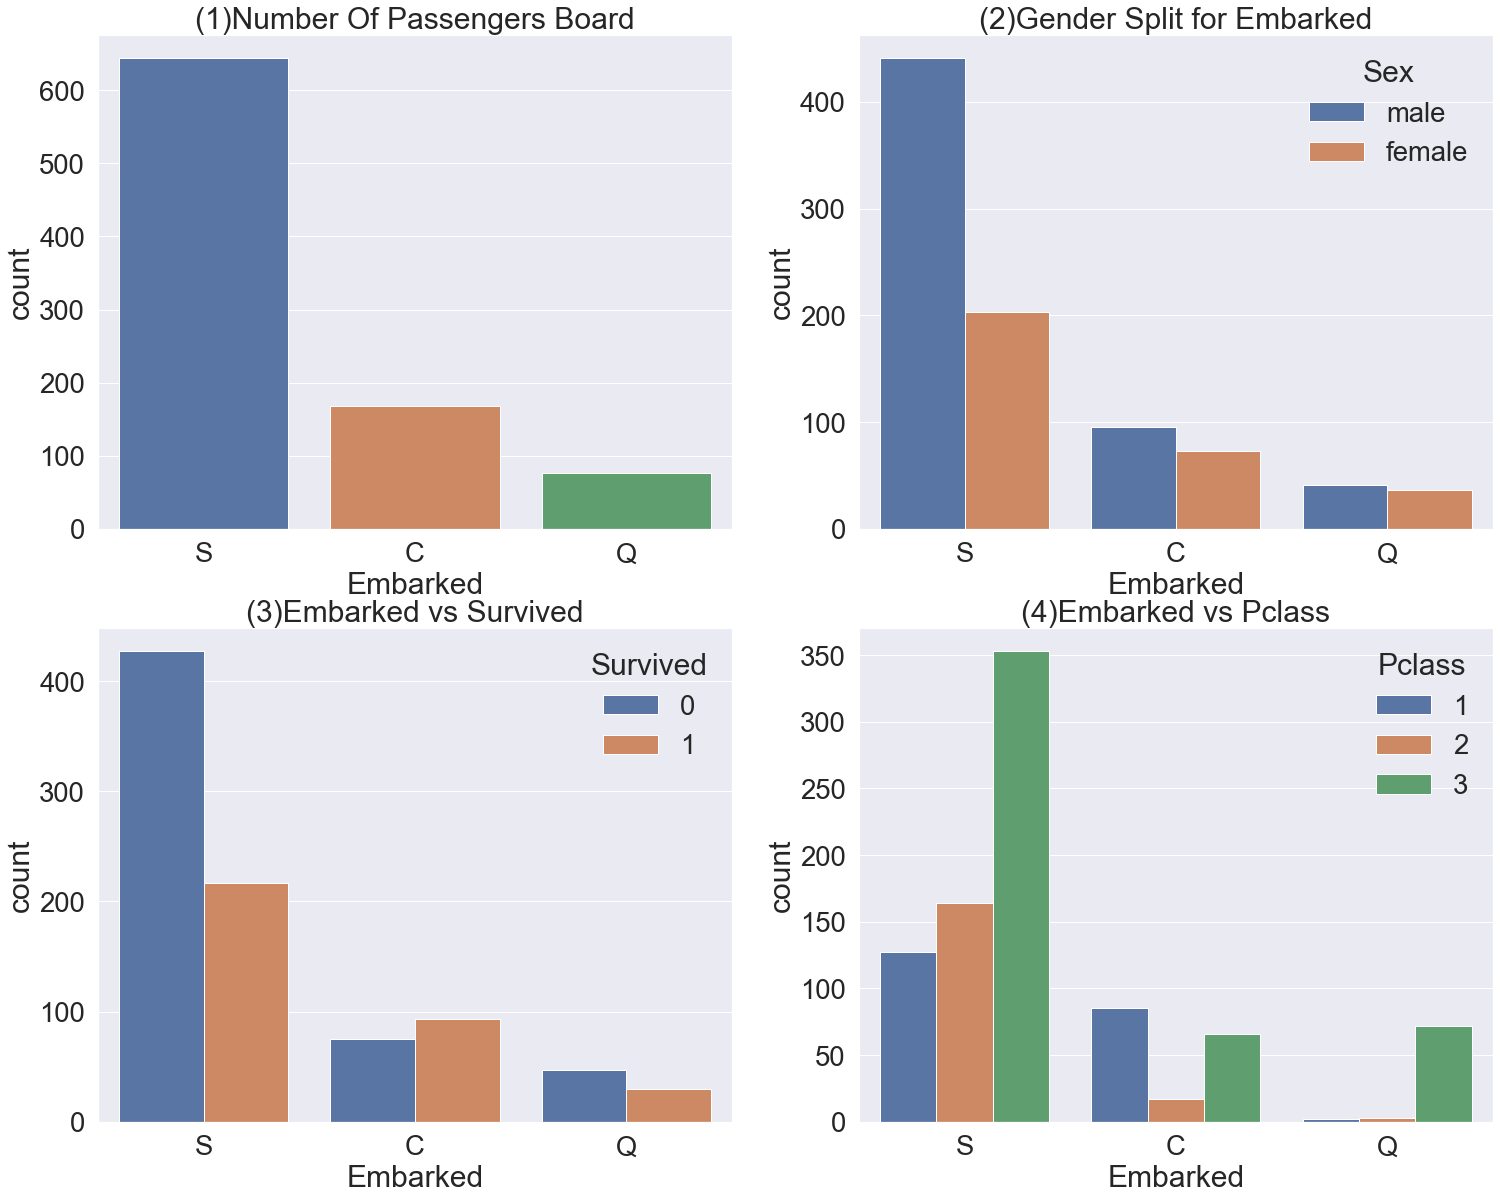

In [79]:
f,ax = plt.subplots(2, 2, figsize = (25, 20))

# 탑승객이 가장 많이 탑승한 항구
sns.countplot('Embarked', data = df_train , ax = ax[0,0])
ax[0,0].set_title("(1)Number Of Passengers Board")

sns.countplot('Embarked', hue = 'Sex', data = df_train , ax = ax[0,1])
ax[0,1].set_title("(2)Gender Split for Embarked")

sns.countplot('Embarked' , hue = 'Survived', data = df_train , ax = ax[1,0])
ax[1,0].set_title("(3)Embarked vs Survived")

sns.countplot('Embarked' , hue = 'Pclass', data = df_train , ax = ax[1,1])
ax[1,1].set_title("(4)Embarked vs Pclass")

- (1) 전체적으로 S 에서 가장 많은 사람이 탑승했다.
- (2) C,Q는 성비가 비슷하지만 , S는 남성이 더 많다.
- (3) 생존확률이 S 의 경우 많이 낮은 편, 반면 C의 경우 상대적으로 생존률이 높다.
- (4) C의 생존률이 높았던 이유는 1st 클래스의 탑승객의 비율이 높기 때문이다.

### Family - SibSp + Parch
- ibSp(형제/자매) + Parch(부모/자녀)
- Family 변수를 생성해 분석하겠다.

In [84]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인 1

In [86]:
print("Maximum size of Family :", df_train['FamilySize'].max())
print("Minimum size of Family :", df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


- FamilySize 와 생존의 관계를 살펴본다

Text(0.5, 1.02, '(3) Survived rate depending on FamilySize')

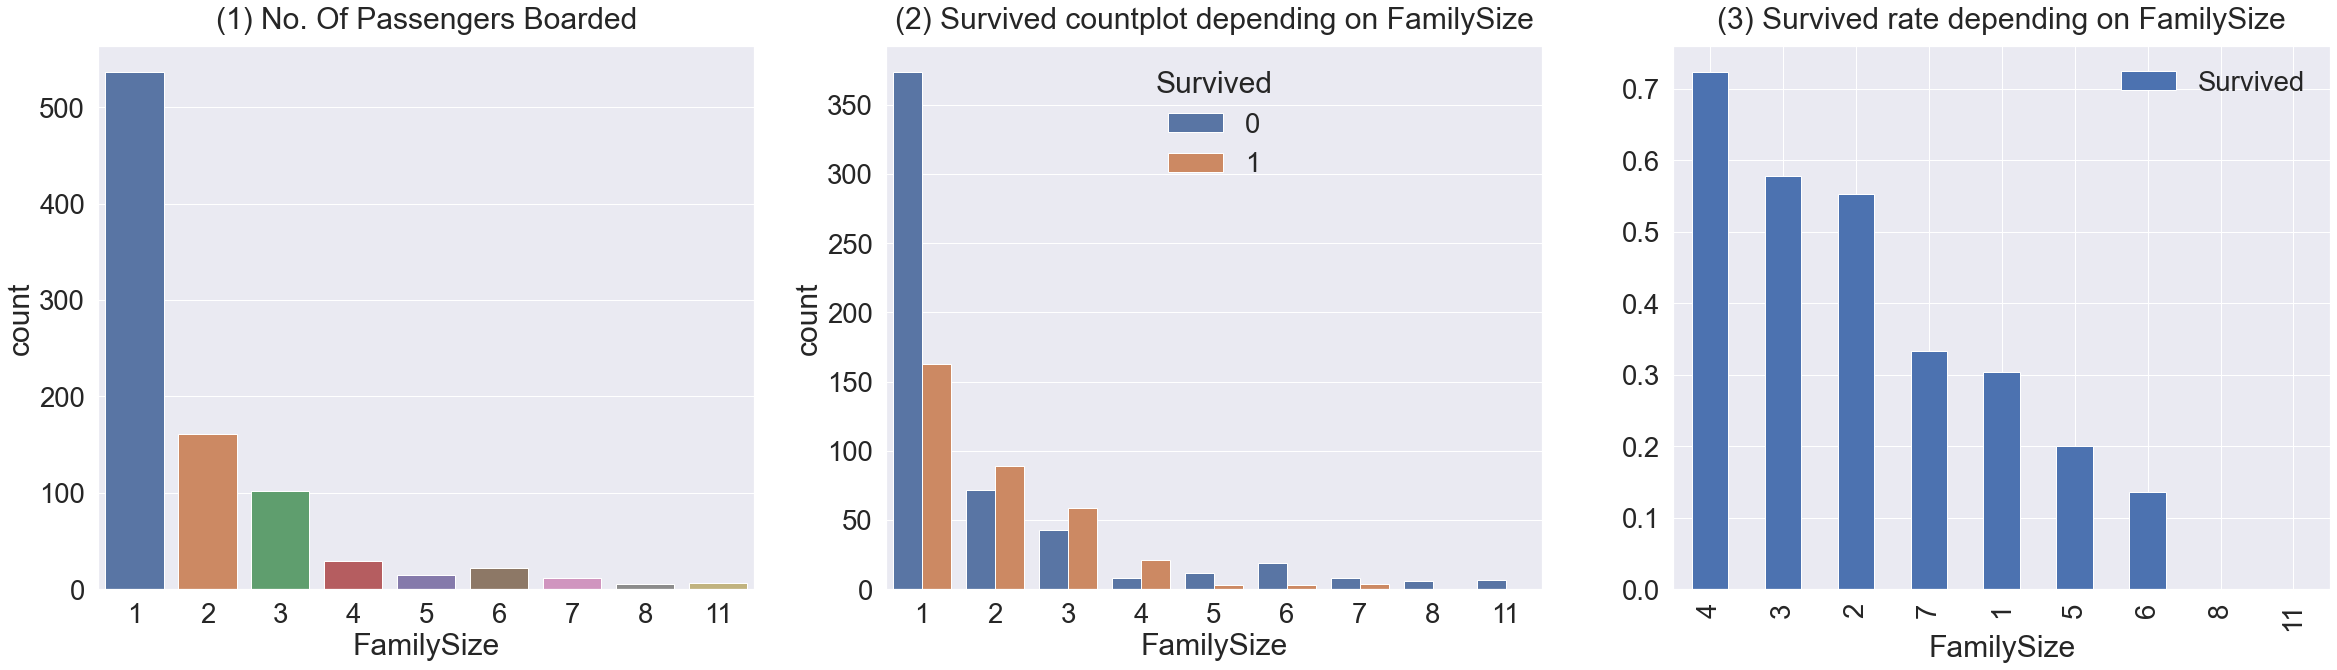

In [91]:
f,ax = plt.subplots(1,3,figsize = (40,10))

# FamilySize 별 탑승객 수
sns.countplot('FamilySize' ,data = df_train , ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# FamilySize 별 탑승객 생존여부
sns.countplot('FamilySize', hue = 'Survived' ,data = df_train , ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize' , y = 1.02)

# FamilySize 별 생존확률
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize' , y = 1.02)

- (1) 가족의 크기가 1 ~ 11 까지 있다. 대부분이 1명이고 그 다음으로 2, 3 , 4 명 순
- (2) 가족이 3~4명인 경우가 생존확률이 가장 높다. 

### Fare 
- Fare 는 탑승요금이고, 연속적 변수이다.

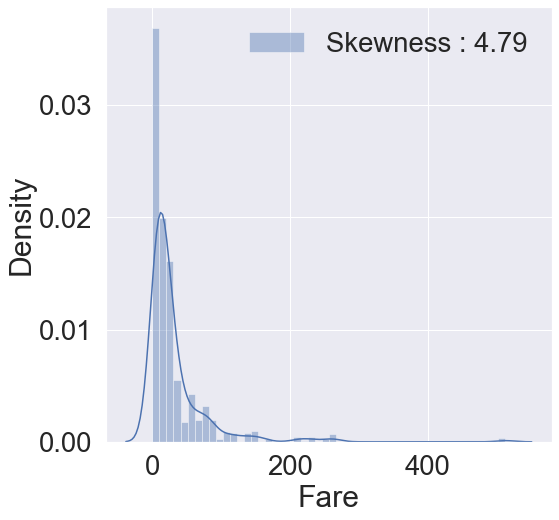

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),
                 ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭이다. 이대로 모델에 적용시키면 모델이 잘못 학습할 수 있다.
- 이상치에 너무 민감하게 반응한다면, 실제 예측 시 좋지 못한 결과를 가져올 수 있다.
- 이상치의 영향을 줄이기 위해 Fare 에 log 를 취하겠다.
- Fare columns 의 데이터 모두 log 값을 취하는 것인데, 파이썬의 간단한 lamda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면 데이터에 적용된다.

In [100]:
# testset 에 있는 NaN 값을 평균값으로 치환한다. 
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

# Fare 컬럼 모두 로그 적용
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0 )
df_test['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0 )

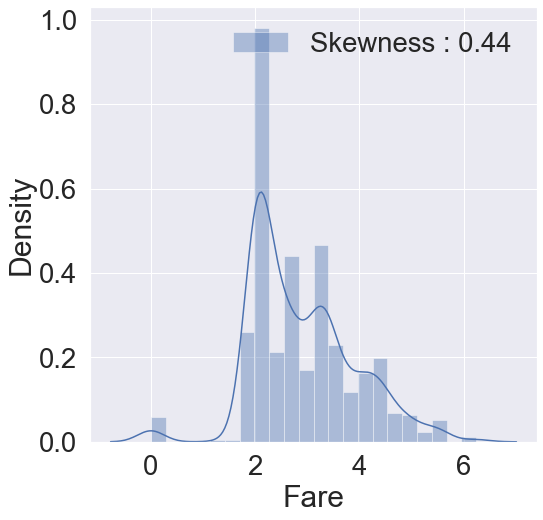

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 비대칭성이 많이 사라졌다.